(10880, 10880)


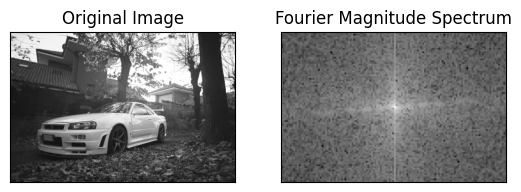

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
path = r"C:\Users\Gurukumar\Pictures\Saved Pictures\wallpaperflare.com_wallpaper (1).jpg"
img = cv2.imread(path, 0)

downsampled_img = img.copy()
for _ in range(4):
    downsampled_img = cv2.resize(downsampled_img, (downsampled_img.shape[1] // 2, downsampled_img.shape[0] // 2))

# Compute the FFT of the downsampled image
fft_result = np.fft.fftshift(np.fft.fft2(downsampled_img))

# Compute the magnitude spectrum (log scale for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fft_result))

# Compute the covariance matrix
N = magnitude_spectrum.size
covariance_mm = np.zeros((N, N), dtype=np.complex128)
for i in range(N):
    covariance_mm[i] = magnitude_spectrum.flatten() * np.conj(magnitude_spectrum.flatten()[i])

# Print the shape of covariance_mm
print(np.shape(covariance_mm))

# Plot the original image and its magnitude spectrum
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
